# plt and sns Lab solution

## <span style="color:red">**Warning:** Please avoid using ChatGPT in the lab.</span>


## Import needed libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()

## Import Data

In [2]:
df = pd.read_csv("shopping_trends.csv")

##### Data source: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data

### Understand the data well

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# Answer the following questions with the right visualization

### Use the specified graph if asked
### Graph completeness (labels and titles) matters.

## 1. what is the percentage of each gender in shopping 

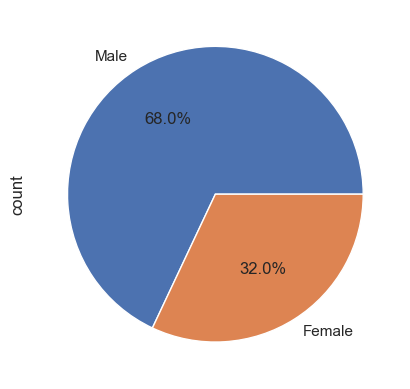

In [4]:
labels = df["Gender"].value_counts()
labels.plot.pie(autopct='%1.1f%%')
plt.show()

## 2. What is the distribution of age given gender (in one graph)

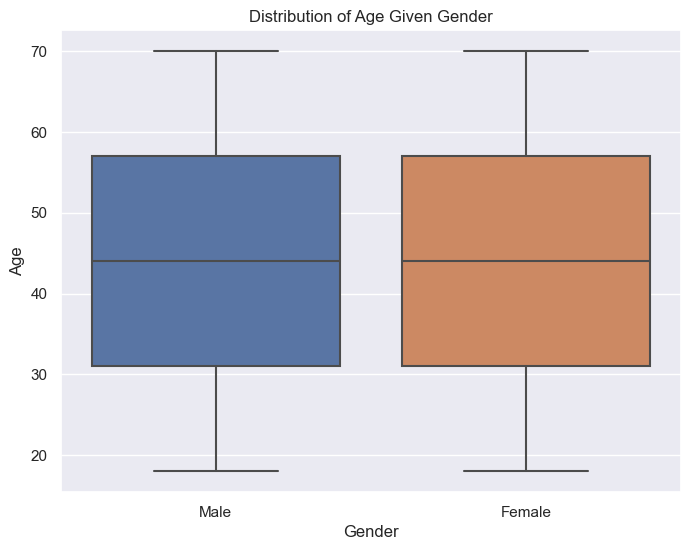

In [5]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Distribution of Age Given Gender')
plt.show()

## 3. How many items in each Category were purchased?

<Figure size 2000x2000 with 0 Axes>

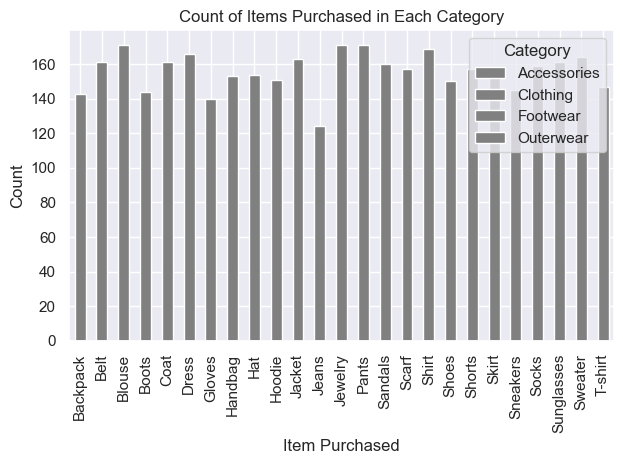

In [17]:
items_purchased_countt = df.groupby(['Item Purchased', 'Category']).size().reset_index(name='Count')

pivot_df = items_purchased_countt.pivot_table(index='Item Purchased', columns='Category', values='Count', fill_value=0)

plt.figure(figsize=(20, 20))
pivot_df.plot(kind='bar', stacked=True, color='gray')
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.title('Count of Items Purchased in Each Category')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

## 4. What is the percentage of each item size purchased?

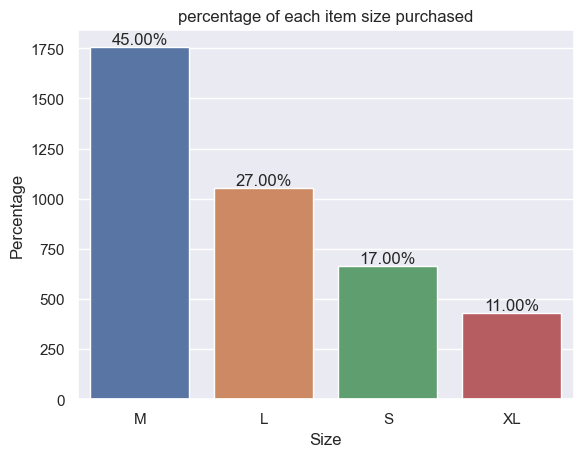

In [7]:
size_count = df['Size'].value_counts()
sns.countplot(x='Size', data=df, order=size_count.index)
plt.ylabel('Percentage')
plt.title('percentage of each item size purchased')

total = len(df['Size'])
for index, value in enumerate(size_count):
    percentage = (value / total) * 100
    plt.text(index, value, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

## 5. What is the distribution of purchase amount per gender? (Use boxplot)

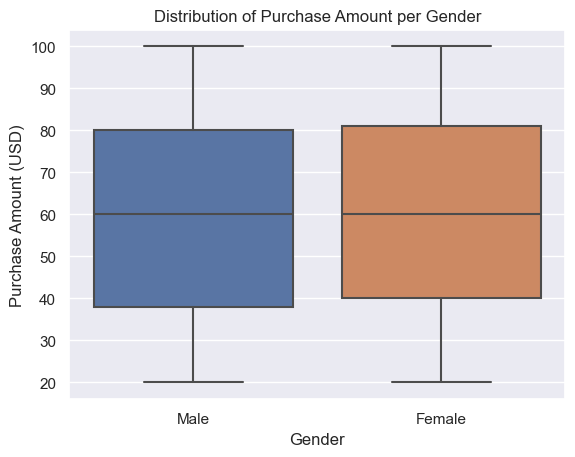

In [8]:
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df)
plt.title('Distribution of Purchase Amount per Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

## 6. What is the ubscription Status by Gender? (use grouped column chart)

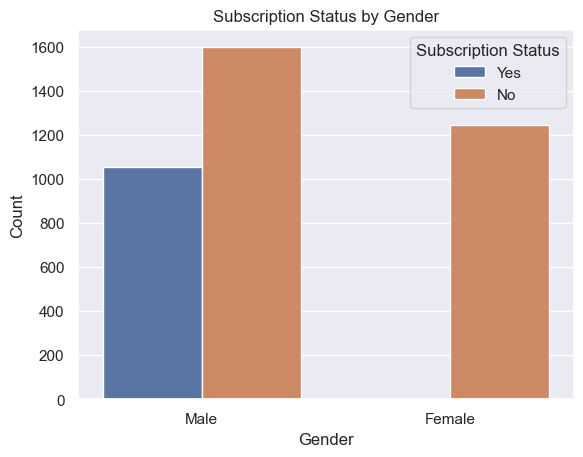

In [9]:
sns.countplot(x='Gender', hue='Subscription Status', data=df)
plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## 7. What is wrong with the following graph? fix it.

### Answer:

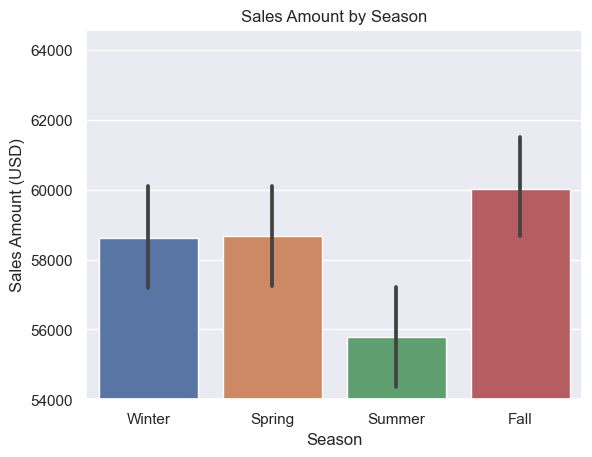

In [10]:
sns.barplot(data=df, x='Season', y='Purchase Amount (USD)', estimator="sum")
plt.ylim(54000,)
plt.title('Sales Amount by Season')
plt.xlabel('Season')
plt.ylabel('Sales Amount (USD)')
plt.show()

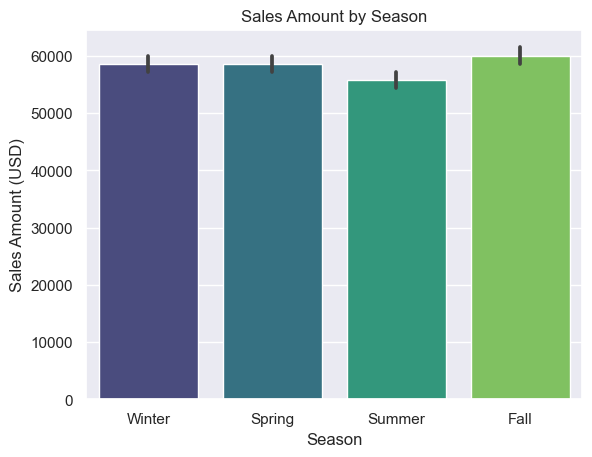

In [11]:
sns.barplot(data=df, x='Season', y='Purchase Amount (USD)', estimator="sum", palette='viridis')
plt.ylim(0,) # Change the lower limit to 0
plt.title('Sales Amount by Season')
plt.xlabel('Season')
plt.ylabel('Sales Amount (USD)')
plt.show()



### 8.What is the distribution of Purchase Amount by Season? (Use KDE)

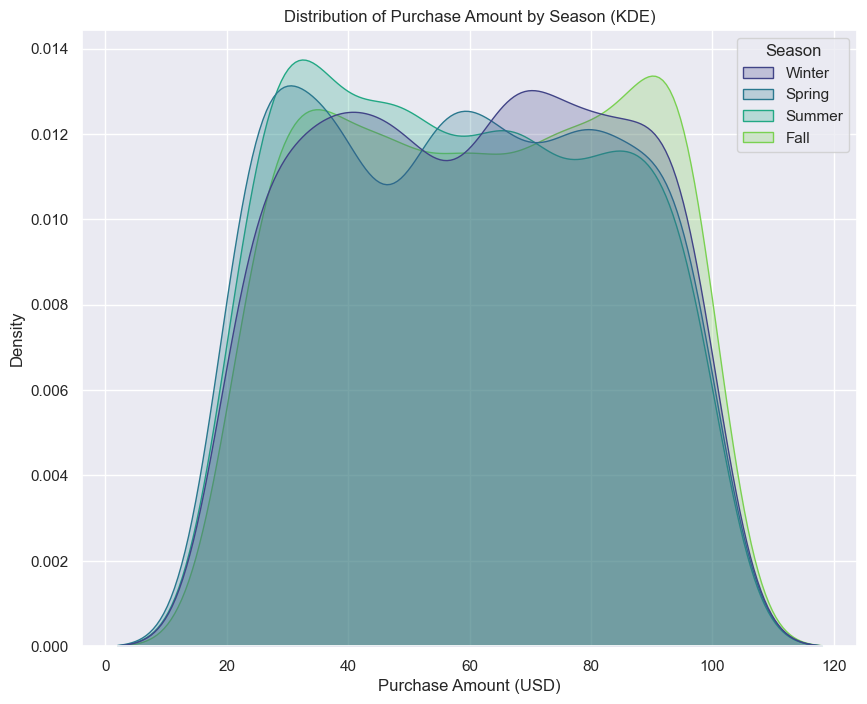

In [12]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x='Purchase Amount (USD)', hue='Season', fill=True, palette='viridis', common_norm=False)
plt.title('Distribution of Purchase Amount by Season (KDE)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Density')
plt.show()

### 9. Which payment method performs the best? 

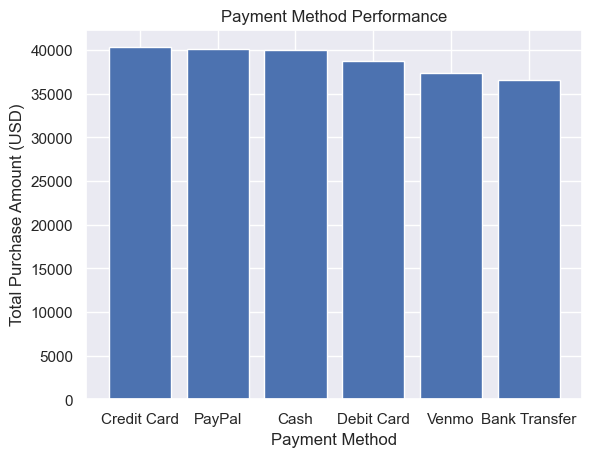

In [13]:
payment_method = df.groupby('Payment Method')['Purchase Amount (USD)']\
  .sum().sort_values(ascending=False)

categories = payment_method.index
values = payment_method.values

plt.bar(categories, values)

# Add a title to the chart
plt.title('Payment Method Performance')

# Add labels to the x-axis and y-axis
plt.xlabel('Payment Method')
plt.ylabel('Total Purchase Amount (USD)')

# Show the chart
plt.show()

### 10. What is the top 10 items purchased?

In [14]:
df['Item Purchased'].value_counts().head(10)

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Name: count, dtype: int64

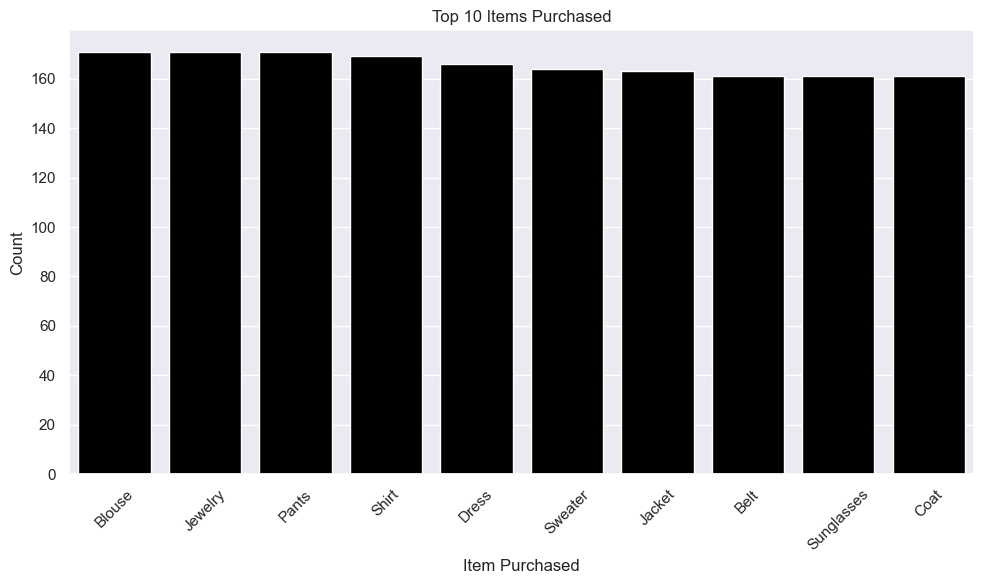

In [15]:
top_10_items = df['Item Purchased'].value_counts().head(10)

top_items_df = top_10_items.reset_index()
top_items_df.columns = ['Item Purchased', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Purchased', y='Count', data=top_items_df, color='black')
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.title('Top 10 Items Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 11. Does offering free shipping affect number of sales?

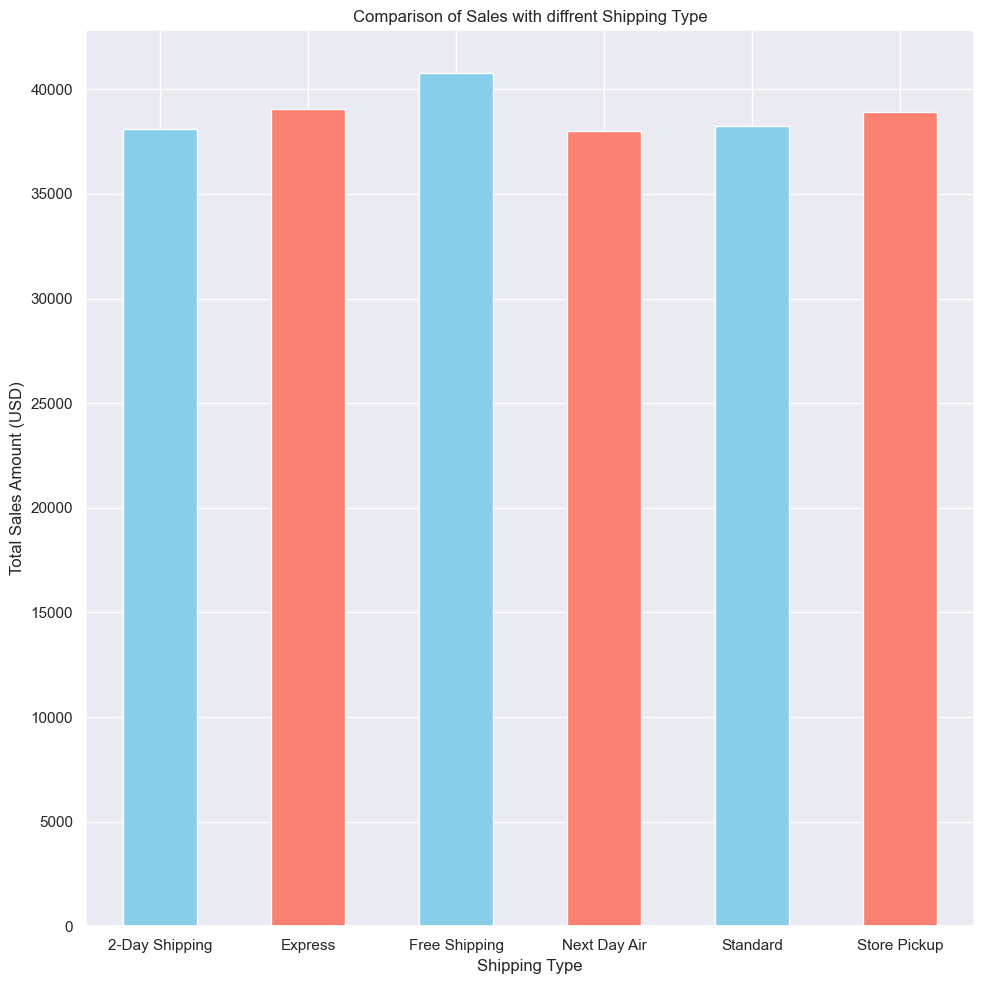

In [16]:
shipping = df.groupby('Shipping Type')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(10, 10))
shipping.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Shipping Type')
plt.ylabel('Total Sales Amount (USD)')
plt.title('Comparison of Sales with diffrent Shipping Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()